In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [16]:
train = pd.read_csv("california_housing_train (1).csv")
test = pd.read_csv("california_housing_test (1).csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (17000, 9)
Test shape: (3000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
# Assuming last column is target (y)
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Add column of ones for bias
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


In [21]:
theta_normal = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train
theta_normal


array([207300.91235294, -86499.60728226, -91744.05083061,  14483.29860201,
       -18263.60700749,  49587.33777166, -44178.15153005,  17470.57604338,
        77291.55314914])

In [22]:
y_pred_normal = X_test_bias @ theta_normal

mse_normal = mean_squared_error(y_test, y_pred_normal)
rmse_normal = np.sqrt(mse_normal)
r2_normal = r2_score(y_test, y_pred_normal)
mae_normal = mean_absolute_error(y_test, y_pred_normal)

mse_normal, rmse_normal, r2_normal, mae_normal


(4867205486.928867, 69765.36022216805, 0.6195057678311999, 50352.228257942894)

In [23]:
def gradient_descent(X, y, alpha=0.01, iters=1000, tol=1e-6):
    n, d = X.shape
    theta = np.zeros(d)
    losses = []
    
    for i in range(iters):
        prediction = X @ theta
        error = prediction - y
        grad = (1/n) * (X.T @ error)
        theta = theta - alpha * grad
        loss = (1/(2*n)) * np.sum(error ** 2)
        losses.append(loss)
        
        if i > 0 and abs(losses[-2] - loss) < tol:
            break
    return theta, losses


In [24]:
theta_gd, losses = gradient_descent(X_train_bias, y_train, alpha=0.01, iters=1000)
theta_gd[:10], len(losses)


(array([207291.96291397, -43380.87670602, -48698.5748263 ,  20379.07086698,
         -5314.47908852,  22577.0636215 , -32476.39420794,  22635.02135468,
         79219.50822346]),
 1000)

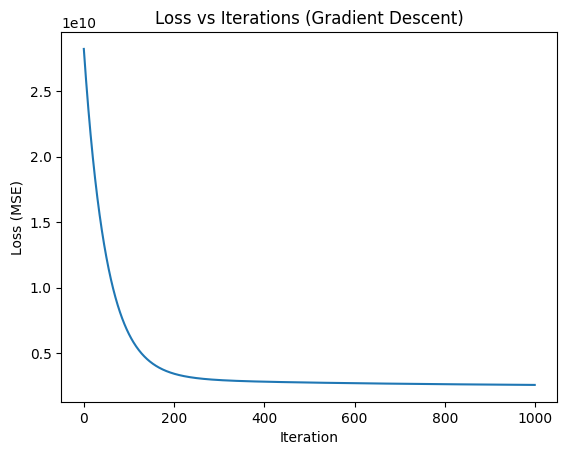

In [25]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Iterations (Gradient Descent)")
plt.show()


In [26]:
y_pred_gd = X_test_bias @ theta_gd

mse_gd = mean_squared_error(y_test, y_pred_gd)
rmse_gd = np.sqrt(mse_gd)
r2_gd = r2_score(y_test, y_pred_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)

mse_gd, rmse_gd, r2_gd, mae_gd


(5149828415.410274, 71762.30497559477, 0.5974116946603373, 51945.74128874486)

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_sklearn = lin_reg.predict(X_test_scaled)

mse_sk = mean_squared_error(y_test, y_pred_sklearn)
rmse_sk = np.sqrt(mse_sk)
r2_sk = r2_score(y_test, y_pred_sklearn)
mae_sk = mean_absolute_error(y_test, y_pred_sklearn)

mse_sk, rmse_sk, r2_sk, mae_sk


(4867205486.9288645, 69765.36022216802, 0.6195057678312001, 50352.22825794287)

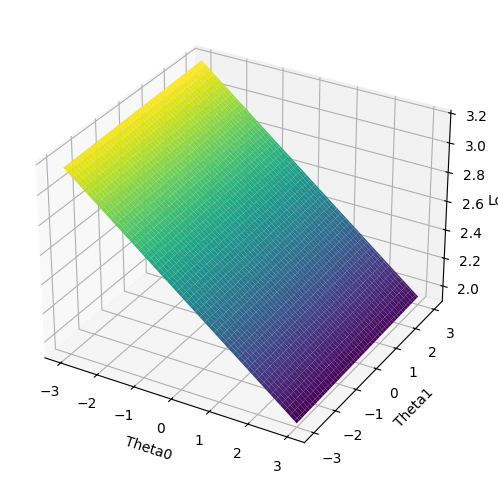

In [28]:
X_small = X_train_bias[:, :3]  # bias + 2 features
theta0_vals = np.linspace(-3, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        theta_try = np.array([t0, t1, 0])  # fix rest as 0
        error = X_small @ theta_try - y_train
        J_vals[i, j] = (1/(2*len(y_train))) * np.sum(error**2)

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals.T, cmap="viridis")
ax.set_xlabel("Theta0")
ax.set_ylabel("Theta1")
ax.set_zlabel("Loss")
plt.show()


In [29]:
results = pd.DataFrame({
    "Model": ["Normal Equation", "Gradient Descent", "Sklearn"],
    "MSE": [mse_normal, mse_gd, mse_sk],
    "RMSE": [rmse_normal, rmse_gd, rmse_sk],
    "R2": [r2_normal, r2_gd, r2_sk],
    "MAE": [mae_normal, mae_gd, mae_sk]
})
results


,Model,MSE,RMSE,R2,MAE
0,Normal Equation,4.867205e+09,69765.360222,0.619506,50352.228258
1,Gradient Descent,5.149828e+09,71762.304976,0.597412,51945.741289
2,Sklearn,4.867205e+09,69765.360222,0.619506,50352.228258


We summarize performance across all three methods.